## WHAT MAKES A GOOD RED WINE

In this notebook, I will try to write a machine learning algorthm that correctly predicts the quality of a red wine based on chemical characteristics. 

I will analyze the Vinho Dataset containing the following attributes about their wine:

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

Quality will be the target variable. First I will import packages and get the csv data.


In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import tree, preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

wines=pd.read_csv('winequality-red.csv', sep = ";")
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Preprocessing
I will drop nans and missing data to allow easier use of the data.

In [22]:
wines=wines.dropna()

# Splitting the Data
## Train Test Split and Predictor/Target Split
This wine data miraculously needs little preprocessing. All the data is numerical and there are no NaNs or missing values. I will move on to train test split with 80% for training, 20% for testing. Quality will be the target variable, and the predictor variables will be chosen from among the other columns during feature selection. 


In [23]:
np.random.seed(1234)
train,test=train_test_split(wines,train_size=0.8, test_size=0.2)
y_train= train['quality']
X_train= train.drop(columns=['quality'])

## Exploratory Data Analysis

Next I will perform exploratory data analysis to see relationships between different features. This will give me a sense of what would make good predictor variables before I calculate it numerically. 

First, I will make a heat map to see all of the correlations between two features.

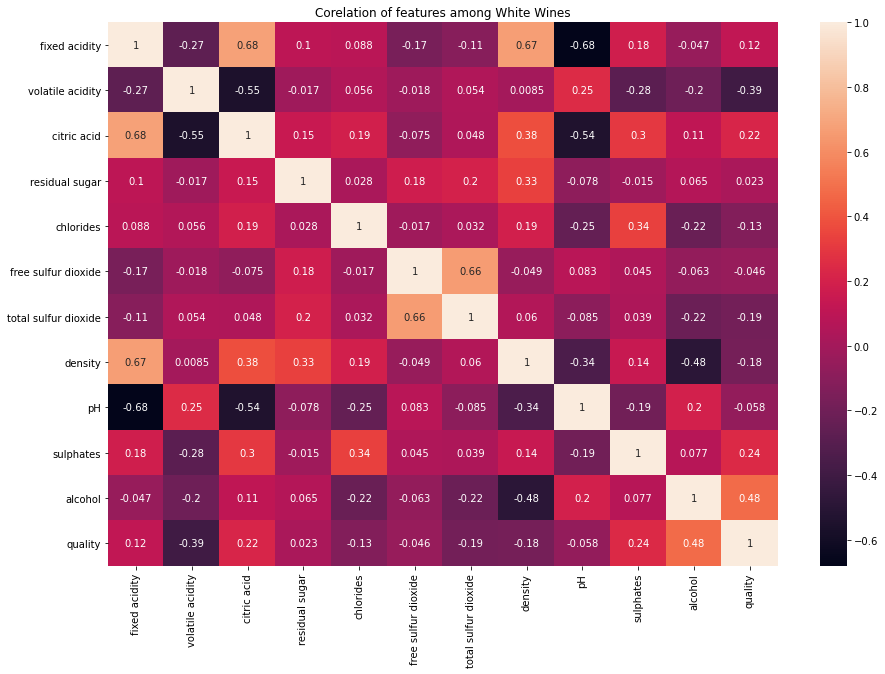

In [24]:
plt.subplots(figsize = (15,10))
sns.heatmap(train.corr(),annot=True).set_title("Corelation of features among White Wines")
plt.show()

From this heat map, we see that alcohol content has the stongest positive correlation with quality, while volitaile acidity has the strongest negative If features have too high of a correlation with other features, it will likely be bad to use both of them in a ML model. For this reason, I will later likely choose between citcric acid/fixed acidity, total sulfur dioxide/free sulfur dioxide, density/fixed acidity, and ph/fixed acidity. 
 

 Next I am going to write a function that plots barplots for qualtiy vs each category

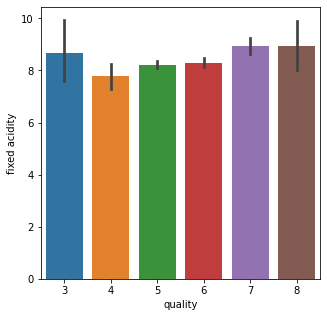

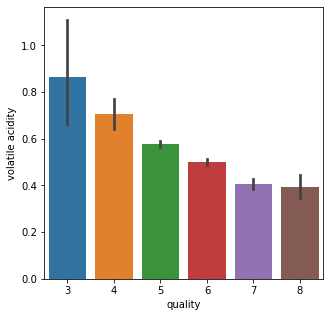

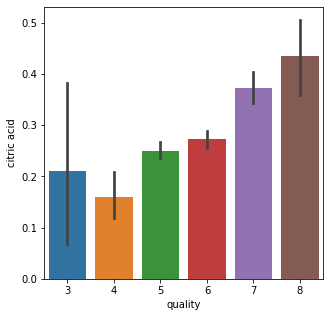

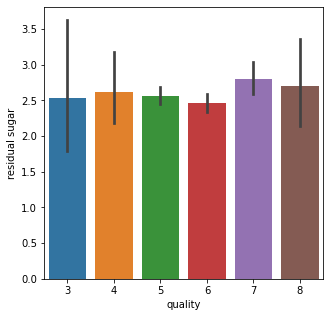

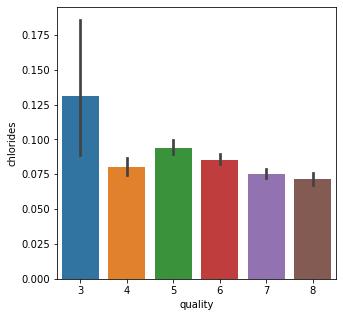

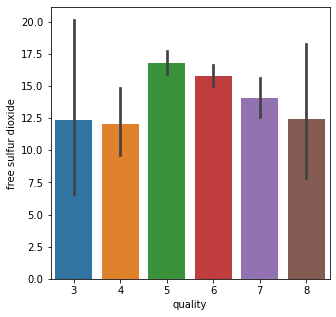

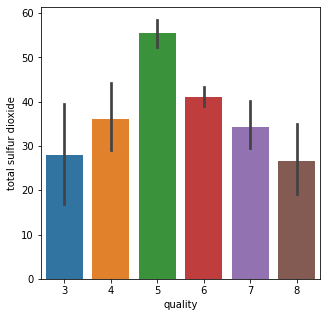

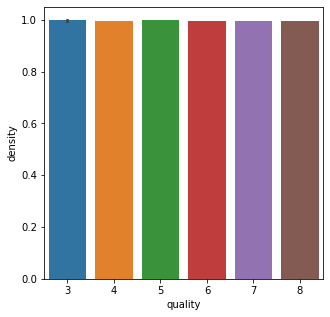

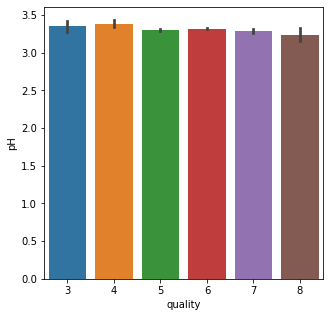

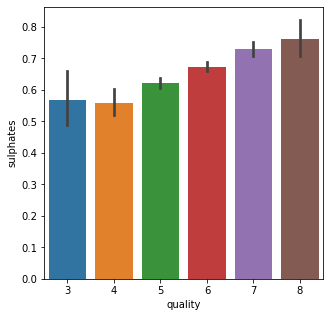

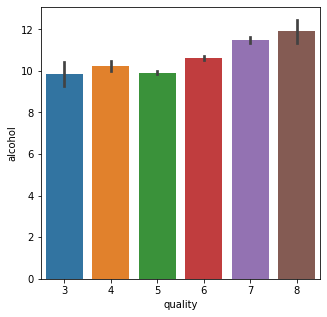

In [25]:
for x in X_train.columns:
    plot=plt.figure(figsize=(5,5))
    sns.barplot(x='quality', y=x, data=train)

From these bar charts, citric acid and volatile acidity have clear differences that are correlated with quality. I will be using 2-3 features for feature selection.

My choices are: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'

Based on the above charts, I will be dropping fixed acidity, residual sugar, density, and pH.

I may drop sulfur dioxide related features. To examine the relationship between quality and free sulfur dioxide, I will make a plot below.

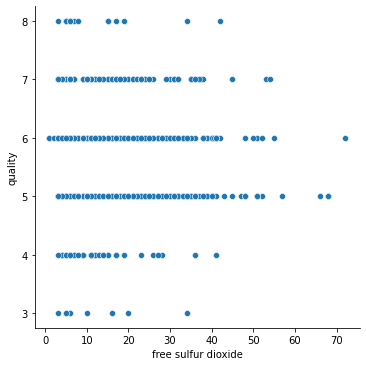

In [26]:
fgrid = sns.relplot(x = "free sulfur dioxide", 
                    y = "quality", 
                    data = train)

## Split into bad, good, and medium quality

Next I split the wine data into wine with low, medium, and high quality. Later, I will use ML to predict which of these three categories the wine goes in.

In [27]:
train['quality']=train['quality'].replace([[3,4],[5,6],[7,8]], [0,1,2])
train

<ipython-input-27-627248a63991>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['quality']=train['quality'].replace([[3,4],[5,6],[7,8]], [0,1,2])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
441,11.9,0.40,0.65,2.15,0.068,7.0,27.0,0.99880,3.06,0.68,11.3,1
227,9.0,0.82,0.14,2.60,0.089,9.0,23.0,0.99840,3.39,0.63,9.8,1
1386,7.4,0.64,0.07,1.80,0.100,8.0,23.0,0.99610,3.30,0.58,9.6,1
1245,7.4,0.55,0.19,1.80,0.082,15.0,34.0,0.99655,3.49,0.68,10.5,1
60,8.8,0.40,0.40,2.20,0.079,19.0,52.0,0.99800,3.44,0.64,9.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1228,5.1,0.42,0.00,1.80,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,2
1077,8.6,0.37,0.65,6.40,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,1
1318,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,1
723,7.1,0.31,0.30,2.20,0.053,36.0,127.0,0.99650,2.94,1.62,9.5,1


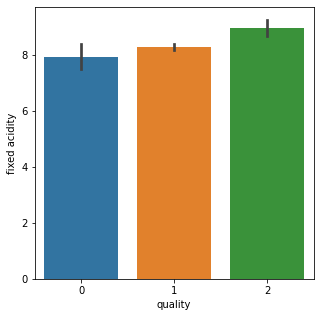

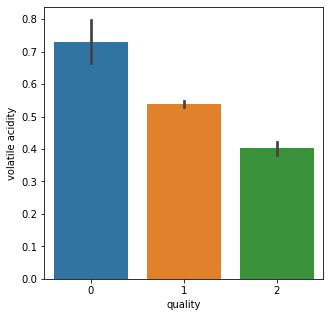

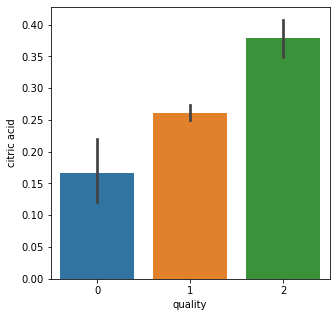

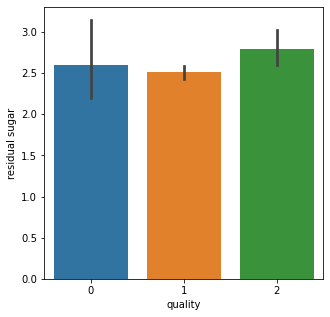

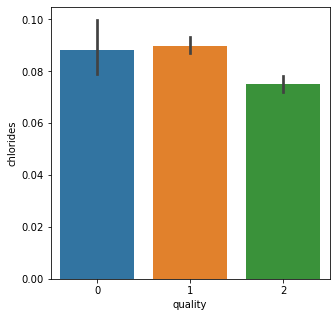

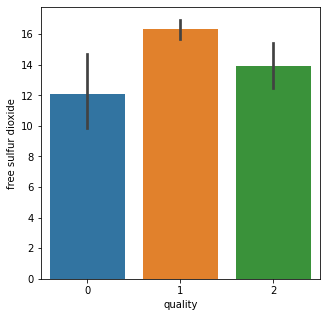

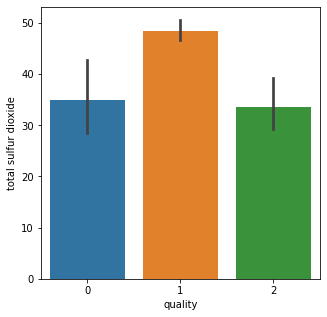

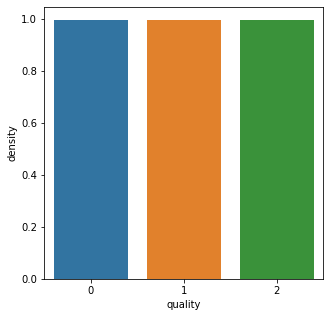

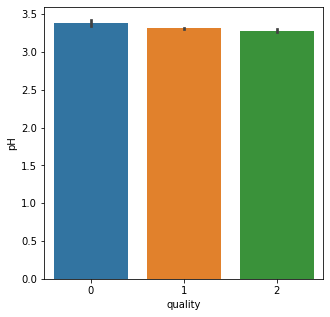

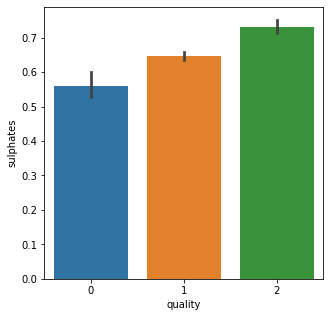

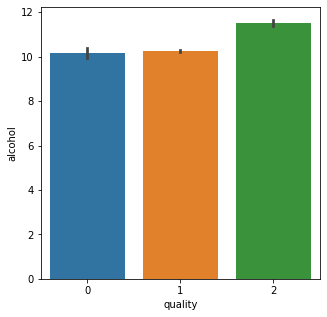

In [28]:
for x in X_train.columns:
    plot=plt.figure(figsize=(5,5))
    sns.barplot(x='quality', y=x, data=train)
    
#make some cat plots

## Feature Selection

The potential features to be used in 'volatile acidity', 'citric acid', 'chlorides', 'sulphates', 'alcohol', chlorides also may not be used

'volatile acidity', 'citric acid', 'sulphates', 'alcohol'


In [29]:
combos = [['volatile acidity', 'citric acid', 'sulphates'],
          ['volatile acidity', 'citric acid',  'alcohol'],
          ['volatile acidity', 'sulphates', 'alcohol'],
          ['citric acid', 'sulphates', 'alcohol'],
          
          ['volatile acidity', 'citric acid'],
          ['volatile acidity', 'sulphates'],
          ['volatile acidity', 'alcohol'],
          ['citric acid', 'sulphates'],
          ['citric acid', 'alcohol'],
          ['sulphates', 'alcohol']]

In [30]:
# Check Column Score for Logistic Regression Model
def check_column_score_LR(cols):
    """
    Trains and evaluates the model via cross validation on the columns 
    of the datset with select indeces 
    """
    print("training with columns "+str(cols))
    #ceate a logisitic regression model
    LR=LogisticRegression(max_iter=500) 
    #return cross validation scores based on parameter
    return cross_val_score(LR,X_train[cols],y_train,cv=5).mean()

for combo in combos:
    #x is the cross validation score calculated for this combo
    x=check_column_score_LR(combo)
    print("CV score is "+str(np.round(x,3))+" (Logistic Regression Model) ")

training with columns ['volatile acidity', 'citric acid', 'sulphates']
CV score is 0.821 (Logistic Regression Model) 
training with columns ['volatile acidity', 'citric acid', 'alcohol']
CV score is 0.829 (Logistic Regression Model) 
training with columns ['volatile acidity', 'sulphates', 'alcohol']
CV score is 0.83 (Logistic Regression Model) 
training with columns ['citric acid', 'sulphates', 'alcohol']
CV score is 0.833 (Logistic Regression Model) 
training with columns ['volatile acidity', 'citric acid']
CV score is 0.822 (Logistic Regression Model) 
training with columns ['volatile acidity', 'sulphates']
CV score is 0.82 (Logistic Regression Model) 
training with columns ['volatile acidity', 'alcohol']
CV score is 0.829 (Logistic Regression Model) 
training with columns ['citric acid', 'sulphates']
CV score is 0.817 (Logistic Regression Model) 
training with columns ['citric acid', 'alcohol']
CV score is 0.826 (Logistic Regression Model) 
training with columns ['sulphates', 'alcoh

In [31]:
#we are seeding to get consistent results
np.random.seed(1234)

# Check Column Score for Random Forests method
def check_column_score_RF(cols):
    """
    Trains and evaluates the model via cross validation on the columns 
    of the datset with select indeces 
    """
    print("training with columns "+str(cols))
    #ceate a random forest classifier model
    RF = RandomForestClassifier()
    #return cross validation scores based on parameter
    return cross_val_score(RF,X_train[cols],y_train,cv=5).mean()

for combo in combos:
    #x is the cross validation score calculated for this combo
    x=check_column_score_RF(combo)
    print("CV score is "+str(np.round(x,3))+" (Random Forests) ")

training with columns ['volatile acidity', 'citric acid', 'sulphates']
CV score is 0.832 (Random Forests) 
training with columns ['volatile acidity', 'citric acid', 'alcohol']
CV score is 0.843 (Random Forests) 
training with columns ['volatile acidity', 'sulphates', 'alcohol']
CV score is 0.837 (Random Forests) 
training with columns ['citric acid', 'sulphates', 'alcohol']
CV score is 0.848 (Random Forests) 
training with columns ['volatile acidity', 'citric acid']
CV score is 0.793 (Random Forests) 
training with columns ['volatile acidity', 'sulphates']
CV score is 0.8 (Random Forests) 
training with columns ['volatile acidity', 'alcohol']
CV score is 0.816 (Random Forests) 
training with columns ['citric acid', 'sulphates']
CV score is 0.811 (Random Forests) 
training with columns ['citric acid', 'alcohol']
CV score is 0.823 (Random Forests) 
training with columns ['sulphates', 'alcohol']
CV score is 0.814 (Random Forests) 


In [32]:
# Check Column Score for Support Vector Machine method
def check_column_score_SVM(cols):
    """
    Trains and evaluates the model via cross validation on the columns 
    of the datset with select indeces 
    """
    print("training with columns "+str(cols))
    #ceate a support vector machine model
    SVM=svm.SVC()
    #return cross validation scores based on parameter
    return cross_val_score(SVM,X_train[cols],y_train,cv=5).mean()

for combo in combos:
    #x is the cross validation score calculated for this combo
    x=check_column_score_SVM(combo)
    print("CV score is "+str(np.round(x,3))+" (Support Vector Machine) ")

training with columns ['volatile acidity', 'citric acid', 'sulphates']
CV score is 0.821 (Support Vector Machine) 
training with columns ['volatile acidity', 'citric acid', 'alcohol']
CV score is 0.821 (Support Vector Machine) 
training with columns ['volatile acidity', 'sulphates', 'alcohol']
CV score is 0.821 (Support Vector Machine) 
training with columns ['citric acid', 'sulphates', 'alcohol']
CV score is 0.821 (Support Vector Machine) 
training with columns ['volatile acidity', 'citric acid']
CV score is 0.821 (Support Vector Machine) 
training with columns ['volatile acidity', 'sulphates']
CV score is 0.821 (Support Vector Machine) 
training with columns ['volatile acidity', 'alcohol']
CV score is 0.821 (Support Vector Machine) 
training with columns ['citric acid', 'sulphates']
CV score is 0.821 (Support Vector Machine) 
training with columns ['citric acid', 'alcohol']
CV score is 0.821 (Support Vector Machine) 
training with columns ['sulphates', 'alcohol']
CV score is 0.821 (S

## TEST THE DATA

In [33]:
test['quality']=test['quality'].replace([[3,4],[5,6],[7,8]], [0,1,2])
y_test= test['quality']
X_test= test.drop(columns=['quality'])

<ipython-input-33-216600bd0ef8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['quality']=test['quality'].replace([[3,4],[5,6],[7,8]], [0,1,2])


In [34]:

best_cols = ['volatile acidity', 'citric acid']
#initializes our scores list to be filled with 10 zeroes
scores=np.zeros(10)
best_score=-np.inf

#for loop from 1-10 to check which c would give best cv score
for c in range(1, 11):
    LR = LogisticRegression(max_iter = 400, C=c)
    #fit our model based on the best columns we decided upon
    LR.fit(X_train[best_cols], y_train)
    scores[c-1]=cross_val_score(LR,X_train[best_cols],y_train,cv=5).mean()
    
    #replacing best score if current c does better
    if scores[c-1]>best_score:
        best_score=scores[c-1]
        best_C=c

best_C

1

In [35]:
LR = LogisticRegression(max_iter = 400, C=7)
LR.fit(X_train[best_cols], y_train)

#check score of our model on both training and testing set
LR_train_score = LR.score(X_train[best_cols], y_train)
LR_test_score = LR.score(X_test[best_cols], y_test)
print("The accuracy score on the training set: " + str(LR_train_score))
print("The accuracy score on the testing set: " + str(LR_test_score))

The accuracy score on the training set: 0.8217357310398749
The accuracy score on the testing set: 0.840625


In [36]:
y_test_pred = LR.predict(X_test[best_cols])
confusion_matrix(y_test, y_test_pred)

array([[  0,  10,   0],
       [  0, 268,   1],
       [  0,  40,   1]])

In [37]:

best_cols = ['citric acid', 'volatile acidity']
#initializes our scores list to be filled with 10 zeroes
scores=np.zeros(10)
best_score=-np.inf

#we are seeding to get consistent results
np.random.seed(1234)

#for loop from 1-10 to check which d would give best cv score
for d in range(1,11):
    RF=RandomForestClassifier(max_depth=d)
    #fit our model based on the best columns we decided upon
    RF.fit(X_train[best_cols], y_train)
    scores[d-1]=cross_val_score(RF,X_train[best_cols],y_train,cv=5).mean()
  
    #replacing best score if current d does better
    if scores[(d-1)]>best_score:
        best_score=scores[d-1]
        best_D=d
        
best_D

1

In [38]:
#we are seeding to get consistent results
np.random.seed(1234)

#create our model and fit to train data
RF=RandomForestClassifier(max_depth=5)
RF.fit(X_train[best_cols], y_train)

#check score of our model on both training and testing set
RF_train_score = RF.score(X_train[best_cols], y_train)
RF_test_score = RF.score(X_test[best_cols], y_test)
print("The accuracy score on the training set: " + str(RF_train_score))
print("The accuracy score on the testing set: " + str(RF_test_score))

The accuracy score on the training set: 0.8397185301016419
The accuracy score on the testing set: 0.84375


In [39]:
y_test_pred = RF.predict(X_test[best_cols])
confusion_matrix(y_test, y_test_pred)

array([[  0,  10,   0],
       [  0, 266,   3],
       [  0,  37,   4]])

## Conclusion

When just looking at the accuracy scores, this seems to be a relatively successful machine learning project. The test and train scores are within 1% of eachother and both pretty high. However, the issue is more evident within the confusion matrix. The bulk of the data falls within the "medium quality" range. This data is highly unbalanced, so it is hard for the computer to predict a low or high quality wine when it has so few samples. I will likely redo this experiment or change the target variable in some way. 
